# Multi-table Datasets - ENRON Archive

## 1. Data import

Connect to the file 'assets/datasets/enron.db' using one of these methods:

- sqlite3 python package
- pandas.read_sql
- SQLite Manager Firefox extension

Take a look at the database and query the master table. How many Tables are there in the db?

In [13]:
import pandas as pd
import numpy as np
import sqlite3
import os

In [17]:
os.getcwd()

'/Users/alex/Desktop/DSI-SF-2-akodate/curriculum/week-05/1.3-database_lab_1/code/starter-code'

In [25]:
db_path = '../../assets/datasets/enron.db'
conn = sqlite3.connect(db_path) 
c = conn.cursor()

Query the `sqlite_master` table to retrieve the schema of the `EmployeeBase` table.

1. What fields are there?
1. What's the type of each of them?

In [34]:
# results = c.execute("SELECT * FROM Employee")
# pd.DataFrame(results.fetchall())

pd.read_sql('SELECT * FROM Employee', con=conn).head()

,eid,name,longdepartment,title,gender,genF,seniority,senJ,department,depL,depT
0,1,John Arnold,ENA Gas Financial,VP Trading,Male,0,Senior,0,Forestry,0,0
1,2,Harry Arora,ENA East Power,VP Trading,Male,0,Senior,0,Forestry,0,0
2,3,Robert Badeer,ENA West Power,Mgr Trading,Male,0,Junior,1,Forestry,0,0
3,4,Susan Bailey,ENA Legal,Specialist Legal,Female,1,Junior,1,Legal,1,0
4,5,Eric Bass,ENA Gas Texas,Trader,Male,0,Junior,1,Forestry,0,0


1. Print the first 5 rows of EmployeeBase table
1. Print the first 5 rows of MessageBase table
1. Print the first 5 rows of RecipientBase table

**Hint**  use `SELECT` and `LIMIT`.

In [36]:
pd.read_sql('SELECT * FROM EmployeeBase LIMIT 5', con=conn)

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


In [37]:
pd.read_sql('SELECT * FROM MessageBase LIMIT 5', con=conn)

,mid,filename,unix_time,subject,from_eid
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138
1,2,taylor-m/sent/17,911459940,Indemnification,138
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138


In [38]:
pd.read_sql('SELECT * FROM RecipientBase LIMIT 5', con=conn)

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


Import each of the 3 tables to a Pandas Dataframes

In [40]:
employee_base = pd.read_sql('SELECT * FROM EmployeeBase', con=conn)
message_base = pd.read_sql('SELECT * FROM MessageBase', con=conn)
recipient_base = pd.read_sql('SELECT * FROM RecipientBase', con=conn)

## 2. Data Exploration

Use the 3 dataframes to answer the following questions:

1. How many employees are there in the company?
- How many messages are there in the database?
- Convert the timestamp column in the messages. When was the oldest message sent? And the newest?
- Some messages are sent to more than one recipient. Group the messages by message_id and count the number of recepients. Then look at the distribution of recepient numbers.
    - how many messages have only one recepient?
    - how many messages have >= 5 recepients?
    - what's the highest number of recepients?
    - who sent the message with the highest number of recepients?
- Plot the distribution of recepient numbers

In [42]:
employee_base['name'].count()

156

In [44]:
message_base['mid'].count()

21635

In [55]:
message_base['time'] = pd.to_datetime(message_base['unix_time'], unit='s')

In [56]:
message_base.head()

,mid,filename,unix_time,subject,from_eid,time
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138,1998-11-13 04:07:00
1,2,taylor-m/sent/17,911459940,Indemnification,138,1998-11-19 07:19:00
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138,1998-11-19 08:24:00
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138,1998-11-24 02:23:00
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138,1998-11-30 03:22:00


In [76]:
# print (recipient_base.groupby('mid').count()['rno'] == 1).value_counts()
recipient_base.groupby('mid').count()['rno'].value_counts()[1]

14985

In [81]:
recipient_base.groupby('mid').count()['rno'].value_counts()[4:].sum()

1380

In [97]:
recipient_base.groupby('mid').count()['rno'].value_counts().index.max()

57

In [98]:
recipient_base.groupby('mid').count()[recipient_base.groupby('mid').count()['rno'] == 57]

,rno,to_eid
mid,,
12116,57,57
12151,57,57


In [103]:
print message_base[message_base['mid'] == 12116]
print message_base[message_base['mid'] == 12151]

         mid                      filename  unix_time subject  from_eid  \
12115  12116  baughman-d/all_documents/398  990510780                67   

                     time  
12115 2001-05-22 05:53:00  
         mid                 filename  unix_time subject  from_eid  \
12150  12151  baughman-d/ect_admin/22  990546780                67   

                     time  
12150 2001-05-22 15:53:00  


In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

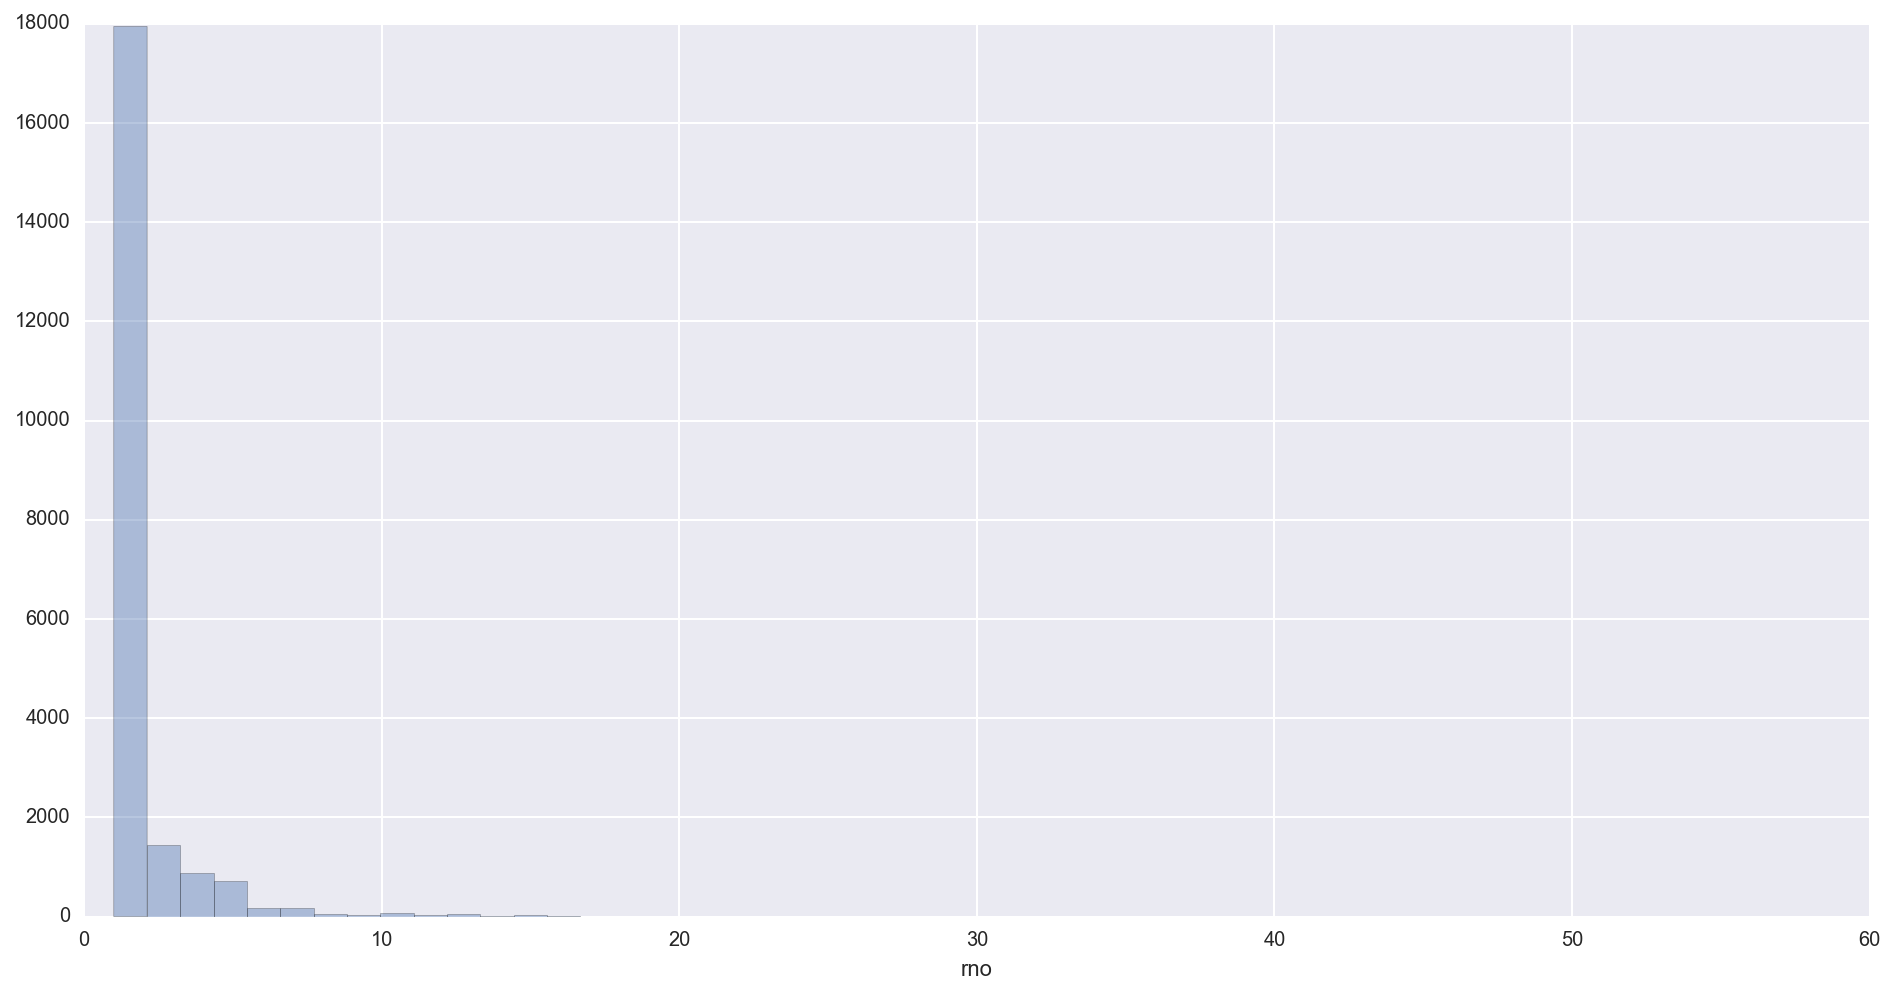

In [124]:
# recipient_base.groupby('mid').count()['rno']
plt.figure(figsize=(16, 8))
sns.distplot(recipient_base.groupby('mid').count()['rno'], kde=False)

Rescale to investigate the tail of the curve

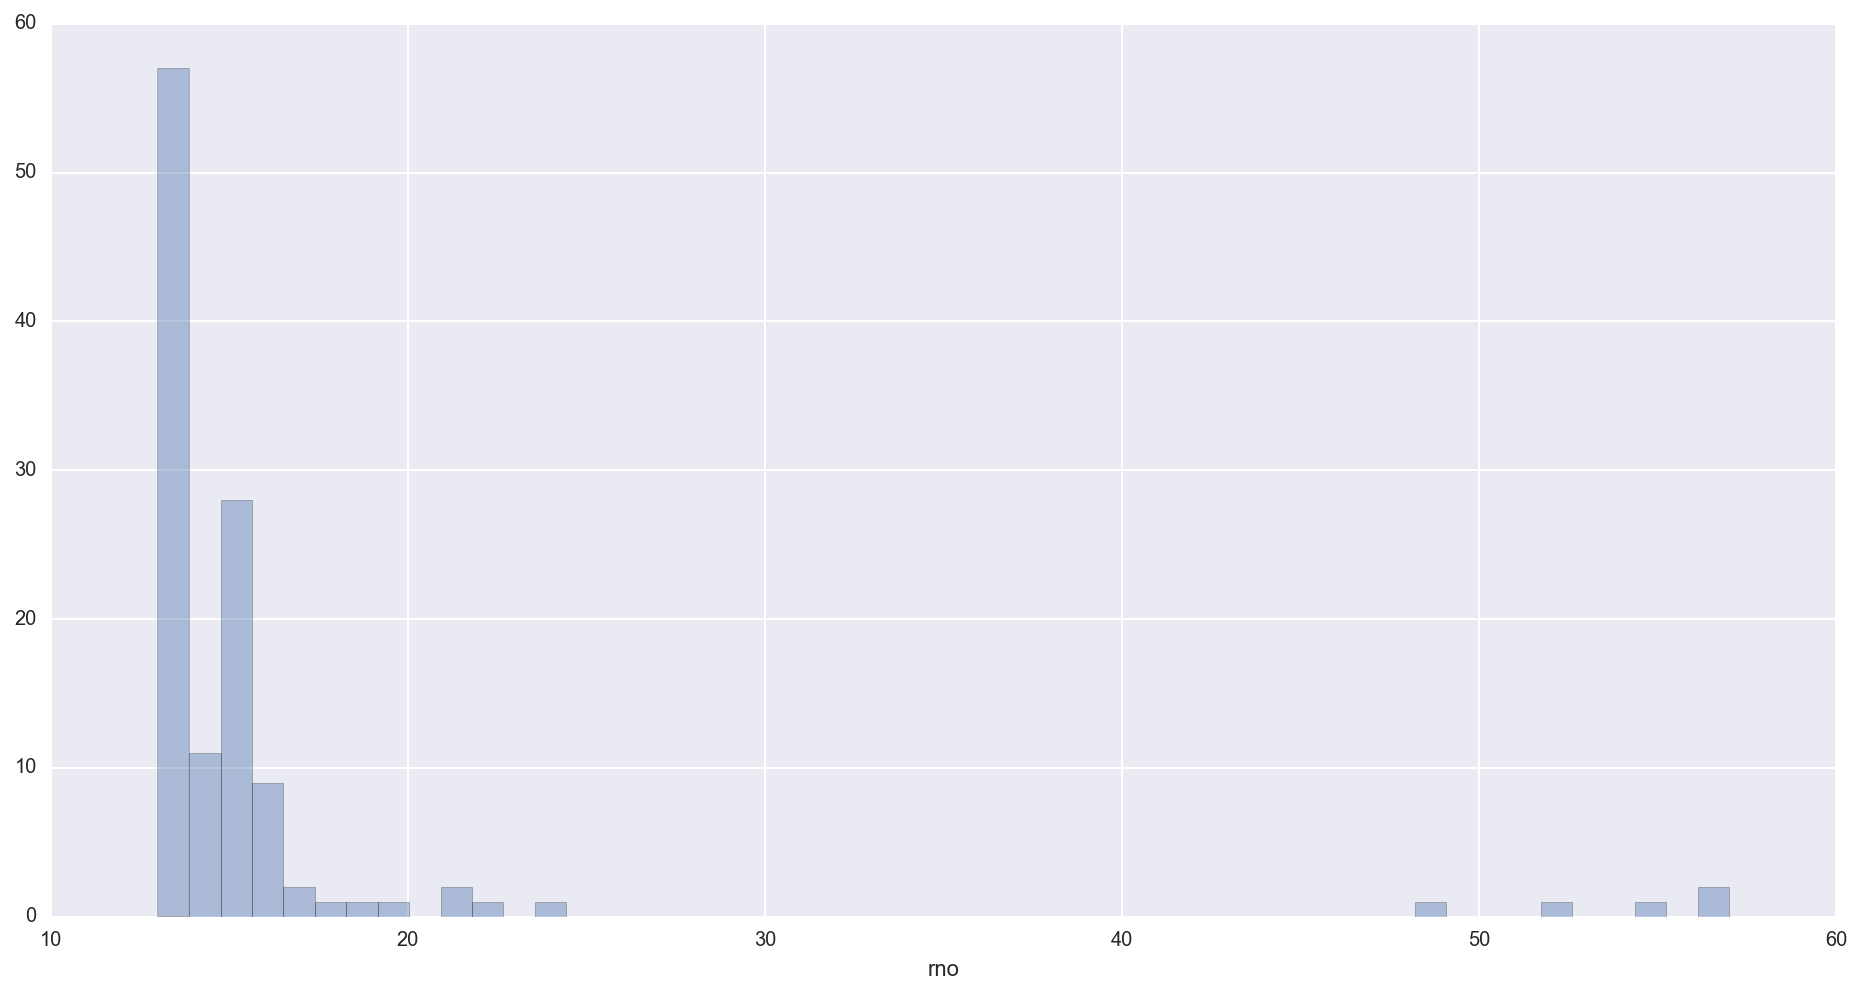

In [180]:
# sns.distplot(recipient_base.groupby('mid').count()['rno'][1:], kde=False)
plt.figure(figsize=(16, 8))
sns.distplot((recipient_base.groupby('mid').count()[recipient_base.groupby('mid').count()['rno'] > 12]['rno']), kde=False)
# recipient_base.groupby('mid').count()['rno'].value_counts()

In [158]:
# recipient_base.groupby('mid').count()['rno'] > 5
recipient_base.groupby('mid').count()[recipient_base.groupby('mid').count()['rno'] > 50]

,rno,to_eid
mid,,
12116,57,57
12140,55,55
12151,57,57
14404,52,52


## 3. Data Merging

Use the pandas merge function to combine the information in the 3 dataframes to answer the following questions:

1. Are there more Men or Women employees?
- How is gender distributed across departments?
- Who is sending more emails? Men or Women?
- What's the average number of emails sent by each gender?
- Are there more Juniors or Seniors?
- Who is sending more emails? Juniors or Seniors?
- Which department is sending more emails? How does that relate with the number of employees in the department?
- Who are the top 3 senders of emails? (people who sent out the most emails)

In [ ]:
employee_base
message_base
recipient_base

In [182]:
employee_base['gender'].value_counts()

Male      113
Female     43
Name: gender, dtype: int64

In [191]:
employee_base.groupby(['department', 'gender']).count()['eid']

department  gender
Forestry    Female    10
            Male      50
Legal       Female    13
            Male      12
Other       Female    20
            Male      51
Name: eid, dtype: int64

In [193]:
employee_base.head()

,eid,name,department,longdepartment,title,gender,seniority
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior
1,2,Harry Arora,Forestry,ENA East Power,VP Trading,Male,Senior
2,3,Robert Badeer,Forestry,ENA West Power,Mgr Trading,Male,Junior
3,4,Susan Bailey,Legal,ENA Legal,Specialist Legal,Female,Junior
4,5,Eric Bass,Forestry,ENA Gas Texas,Trader,Male,Junior


In [192]:
message_base.head()

,mid,filename,unix_time,subject,from_eid,time
0,1,taylor-m/sent/11,910930020,Cd$ CME letter,138,1998-11-13 04:07:00
1,2,taylor-m/sent/17,911459940,Indemnification,138,1998-11-19 07:19:00
2,3,taylor-m/sent/18,911463840,Re: Indemnification,138,1998-11-19 08:24:00
3,4,taylor-m/sent/23,911874180,"Re: Coral Energy, L.P.",138,1998-11-24 02:23:00
4,5,taylor-m/sent/27,912396120,Bankruptcy Code revisions,138,1998-11-30 03:22:00


In [195]:
recipient_base.head()

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


In [201]:
merged = employee_base.merge(message_base, how='left', left_on='eid', right_on='from_eid')
print merged.shape
merged.head()

(21639, 13)


,eid,name,department,longdepartment,title,gender,seniority,mid,filename,unix_time,subject,from_eid,time
0,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1611.0,arnold-j/sent/379,954317280.0,Re: Insurance Call Spread,1.0,2000-03-29 08:08:00
1,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1615.0,arnold-j/sent/377,954328920.0,New curve generation methodology,1.0,2000-03-29 11:22:00
2,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1722.0,arnold-j/sent/365,955447080.0,Option Analysis on NG Price Book,1.0,2000-04-11 09:58:00
3,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1723.0,arnold-j/sent/364,955448160.0,,1.0,2000-04-11 10:16:00
4,1,John Arnold,Forestry,ENA Gas Financial,VP Trading,Male,Senior,1763.0,arnold-j/sent/362,955701240.0,Re: options,1.0,2000-04-14 08:34:00


In [ ]:
# Who is sending more emails? Men or Women?
# What's the average number of emails sent by each gender?
# Are there more Juniors or Seniors?
# Who is sending more emails? Juniors or Seniors?
# Which department is sending more emails? How does that relate with the number of employees in the department?
# Who are the top 3 senders of emails? (people who sent out the most emails)

In [209]:
print "E-mails per male:", float(merged['gender'].value_counts()[0]) / employee_base['gender'].value_counts()[0]
print "E-mails per female:", float(merged['gender'].value_counts()[1]) / employee_base['gender'].value_counts()[1]
merged['gender'].value_counts()

E-mails per male: 113.654867257
E-mails per female: 204.558139535


Male      12843
Female     8796
Name: gender, dtype: int64

In [210]:
employee_base['seniority'].value_counts()

Junior    82
Senior    74
Name: seniority, dtype: int64

In [211]:
print "E-mails per junior:", float(merged['seniority'].value_counts()[0]) / employee_base['seniority'].value_counts()[0]
print "E-mails per senior:", float(merged['seniority'].value_counts()[1]) / employee_base['seniority'].value_counts()[1]

E-mails per junior: 151.695121951
E-mails per senior: 124.324324324


In [219]:
print employee_base['department'].value_counts()
print merged['department'].value_counts()
print "E-mails per Other Dept. member:", float(merged['department'].value_counts()[0]) / employee_base['department'].value_counts()[0]
print "E-mails per Forestry Dept. member:", float(merged['department'].value_counts()[1]) / employee_base['department'].value_counts()[1]
print "E-mails per Legal Dept. member:", float(merged['department'].value_counts()[2]) / employee_base['department'].value_counts()[2]

Other       71
Forestry    60
Legal       25
Name: department, dtype: int64
Legal       10396
Other        6855
Forestry     4388
Name: department, dtype: int64
E-mails per Other Dept. member: 146.422535211
E-mails per Forestry Dept. member: 114.25
E-mails per Legal Dept. member: 175.52


In [224]:
merged.groupby('name').count()['eid'].sort_values(ascending=False).head(3)

name
Jeff Dasovich      1597
Tana Jones         1379
Sara Shackleton    1142
Name: eid, dtype: int64

Also answer the following questions regarding received messages

- Who is receiving more emails? Men or Women?
- Who is receiving more emails? Juniors or Seniors?
- Which department is receiving more emails? How does that relate with the number of employees in the department?
- Who are the top 5 receivers of emails? (people who received the most emails)

In [227]:
recipient_base.head()

,mid,rno,to_eid
0,1,1,59
1,2,1,15
2,3,1,15
3,4,1,109
4,4,2,49


In [229]:
merged2 = employee_base.merge(recipient_base, how='left', left_on='eid', right_on='to_eid')

In [231]:
merged2.groupby('name').count()['to_eid'].head()

name
Andrea Ring         56
Andrew H. Lewis     37
Andy Zipper        199
Barry Tycholiz     483
Benjamin Rogers     45
Name: to_eid, dtype: int64

Which employees sent the most 'mass' emails?

In [237]:
merged2.groupby('name').count()['to_eid'].sort_values(ascending=False).head(3)

name
James D. Steffes    1797
Richard Shapiro     1730
Mark E. Taylor      1477
Name: to_eid, dtype: int64

Keep exploring the dataset, which other questions would you ask?

Work in pairs. Give each other a challenge and try to solve it.